In [95]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import community
import itertools
from ast import literal_eval
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
match_data = pd.read_csv('matches.csv', converters={"bKills": literal_eval, "rKills": literal_eval})

[8.105, 'H2K Odoamne', 'SPY Trashy', ['SPY Wunder'], 3424, 10336]
[8.619, 'H2K Chei', 'SPY Mikyx', ['SPY Kobbe'], 13475, 4146]
[8.819, 'H2K Odoamne', 'SPY Wunder', ['SPY Kobbe', 'SPY Mikyx'], 11772, 3151]
[10.893, 'H2K Odoamne', 'SPY Wunder', ['SPY Trashy'], 4466, 10106]
[20.773, 'H2K Jankos', 'SPY Trashy', ['SPY Kobbe', 'SPY Mikyx'], 1644, 12634]
[20.847, 'H2K Odoamne', 'SPY Sencux', ['SPY Wunder', 'SPY Trashy'], 3022, 12150]
[24.275, 'H2K Febiven', 'SPY Mikyx', ['SPY Wunder'], 5298, 6159]
[27.156, 'H2K Jankos', 'SPY Kobbe', ['SPY Trashy', 'SPY Sencux', 'SPY Mikyx'], 1914, 2950]
[27.26, 'H2K Nuclear', 'SPY Kobbe', [], 606, 1482]
[27.302, 'H2K Febiven', 'SPY Mikyx', ['SPY Trashy'], 829, 510]


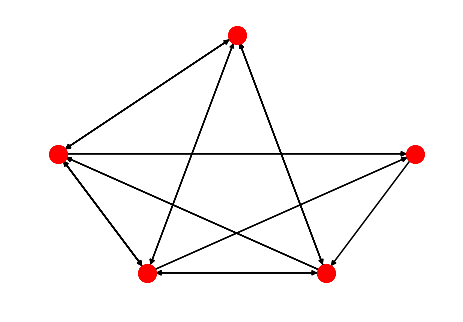

In [106]:
time = [0]
density = [0]
assist_graph = nx.DiGraph()
positions = [(1,0),(0,2),(2,4),(3,0),(4,2)]
i = 1
nodes = 0

# 0 (TSM vs C9) y 1701 (H2K vs SPY)

for kill in match_data.iloc[1701]['bKills']:
    
    print(kill)
    # add time point
    time.append(kill[0])
    # add killer
    
    killer = kill[2]
    
    if (killer not in assist_graph):
        assist_graph.add_node(killer, p = positions[nodes])
        nodes = nodes + 1
    
    for assistant in kill[3]:
        
        if (assistant not in assist_graph):
            assist_graph.add_node(assistant, p = positions[nodes])
            nodes = nodes + 1
            
        if assist_graph.has_edge(assistant,killer):
            assist_graph[assistant][killer]['weight'] += 1 
        else:
            assist_graph.add_edge(assistant, killer, weight = 1)
    
    # plt.figure(i)
    pos = nx.get_node_attributes(assist_graph,'p')
    nx.draw(assist_graph, pos = pos)
    plt.savefig(str(i) + '.png', bbox_inches='tight')
    
    density.append(nx.density(assist_graph))
    
    i = i + 1
    

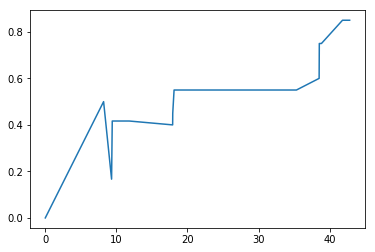

In [66]:
plt.plot(time, density)

In [74]:
nx.degree(assist_graph)

DiDegreeView({'Crew HanShao ': 3, 'Crew HanJi ': 4, 'Crew LeeMid ': 4, 'Crew HoNeyRain ': 2, 'Crew ThreshMelon': 1})

In [81]:
assist_graph.in_degree()

InDegreeView({'TSM Bjergsen': 4, 'TSM WildTurtle': 4, 'TSM Santorin': 3, 'TSM Lustboy': 0, 'TSM Dyrus': 4})

In [79]:
indegree =[]
for u, v in list(assist_graph.in_degree(weight = 'weight')):
        indegree.append(v)
indegree

[12, 12, 1, 8, 7]

In [82]:
assist_graph.in_degree(weight = 'weight')

InDegreeView({'TSM Bjergsen': 26, 'TSM WildTurtle': 18, 'TSM Santorin': 3, 'TSM Lustboy': 0, 'TSM Dyrus': 7})

In [61]:
assist_graph.out_degree(weight = 'weight')

OutDegreeView({'CLG Doublelift': 6, 'CLG Xmithie': 15, 'CLG aphromoo': 20, 'CLG Benny': 14, 'CLG Link': 10})

In [54]:
assist_graph.edges()

OutEdgeView([('TSM Bjergsen', 'TSM WildTurtle'), ('TSM Bjergsen', 'TSM Dyrus'), ('TSM Bjergsen', 'TSM Santorin'), ('TSM Bjergsen', 'TSM Lustboy'), ('TSM WildTurtle', 'TSM Bjergsen'), ('TSM WildTurtle', 'TSM Dyrus'), ('TSM WildTurtle', 'TSM Santorin'), ('TSM WildTurtle', 'TSM Lustboy'), ('TSM Santorin', 'TSM WildTurtle'), ('TSM Santorin', 'TSM Bjergsen'), ('TSM Santorin', 'TSM Dyrus'), ('TSM Santorin', 'TSM Lustboy'), ('TSM Lustboy', 'TSM WildTurtle'), ('TSM Lustboy', 'TSM Bjergsen'), ('TSM Lustboy', 'TSM Dyrus'), ('TSM Lustboy', 'TSM Santorin'), ('TSM Dyrus', 'TSM Bjergsen'), ('TSM Dyrus', 'TSM WildTurtle'), ('TSM Dyrus', 'TSM Santorin'), ('TSM Dyrus', 'TSM Lustboy')])

In [53]:
assist_graph.add_edges_from(nx.non_edges(assist_graph), weight = 0)

In [62]:
indegree = []
outdegree = []
for u, v in list(assist_graph.in_degree(weight = 'weight')):
    indegree.append(v)
print(indegree)
print(sum(indegree))
print(max(indegree))

for u, v in list(assist_graph.out_degree(weight = 'weight')):
    outdegree.append(v)
print(outdegree)
print(sum(outdegree))
print(max(outdegree))

total = 0
for n in indegree:
    total = total + (max(indegree) - n)
print(total/4/sum(indegree))

for n in outdegree:
    total = total + (max(outdegree) - n)
print(total/4/sum(outdegree))
    

[22, 9, 3, 5, 26]
65
26
[6, 15, 20, 14, 10]
65
20
0.25
0.38461538461538464


In [63]:
weight_list = []
for u,v,w in list(assist_graph.edges(data = True)):
    weight_list.append(list(w.values())[0])
print(weight_list)

cw = 0
max_w = max(weight_list)
for n in weight_list:
    cw = cw + (max_w - n)

print(sum(weight_list))
print(cw/19/sum(weight_list))

[1, 1, 4, 5, 8, 2, 7, 3, 8, 2, 2, 5, 1, 6, 3, 5, 1, 1]
65
0.06396761133603239


In [84]:
nx.write_graphml(assist_graph, "test_tsm.graphml")

KeyError: <class 'tuple'>

## A ver el rojo

In [110]:
time = [0]
density = [0]
assist_graph = nx.DiGraph()
positions = [(1,0),(0,2),(2,4),(3,0),(4,2)]
i = 1
nodes = 0
pos = {}

for kill in match_data.iloc[1701]['rKills']:
    
    print(kill)
    # add time point
    time.append(kill[0])
    # add killer
    
    killer = kill[2]
    
    if (killer not in assist_graph):
        assist_graph.add_node(killer)
        pos[killer] = positions[nodes]
        nodes = nodes + 1
    
    for assistant in kill[3]:
        
        if (assistant not in assist_graph):
            assist_graph.add_node(assistant)
            pos[assistant] = positions[nodes]
            nodes = nodes + 1
            
        if assist_graph.has_edge(assistant,killer):
            assist_graph[assistant][killer]['weight'] += 1 
        else:
            assist_graph.add_edge(assistant, killer, weight = 1)
    
    # plt.figure(i)
   # nx.draw(assist_graph, pos = pos)
   # plt.savefig(str(i) + '.png', bbox_inches='tight')
    
    density.append(nx.density(assist_graph))
    
    i = i + 1
    

[4.026, 'SPY Wunder', 'H2K Jankos', ['H2K Odoamne'], 1554, 10978]
[6.669, 'SPY Sencux', 'H2K Febiven', ['H2K Jankos'], 6809, 7475]
[7.802, 'SPY Sencux', 'H2K Jankos', [], 6571, 7773]
[8.206, 'SPY Wunder', 'H2K Jankos', ['H2K Odoamne', 'H2K Febiven'], 3768, 9889]
[16.627, 'SPY Sencux', 'H2K Jankos', [], 7297, 1421]
[16.686, 'SPY Trashy', 'H2K Febiven', ['H2K Nuclear', 'H2K Chei'], 7931, 1539]
[18.492, 'SPY Trashy', 'H2K Nuclear', ['H2K Odoamne', 'H2K Jankos', 'H2K Chei'], 8356, 7501]
[18.645, 'SPY Sencux', 'H2K Nuclear', ['H2K Odoamne', 'H2K Jankos'], 8094, 7501]
[18.745, 'SPY Mikyx', 'H2K Chei', ['H2K Nuclear'], 6243, 4739]
[18.793, 'SPY Wunder', 'H2K Febiven', ['H2K Nuclear', 'H2K Chei'], 7483, 4904]
[20.71, 'SPY Mikyx', 'H2K Jankos', [], 2846, 12630]
[20.78, 'SPY Wunder', 'H2K Nuclear', ['H2K Odoamne', 'H2K Chei'], 4297, 11705]
[20.816, 'SPY Trashy', 'H2K Febiven', ['H2K Odoamne', 'H2K Nuclear', 'H2K Chei'], 1300, 12675]
[20.879, 'SPY Kobbe', 'H2K Febiven', ['H2K Jankos', 'H2K Nuclea

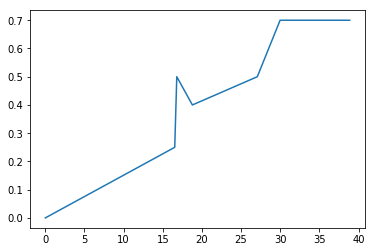

In [79]:
plt.plot(time, density)

In [101]:
print(nx.degree(assist_graph))
print(nx.degree(assist_graph, weight = 'weight'))
print(assist_graph.in_degree(weight = 'weight'))
print(assist_graph.out_degree(weight = 'weight'))


[('C9 Balls', 6), ('C9 Meteos', 6), ('C9 Hai', 7), ('C9 Sneaky', 7), ('C9 LemonNation', 2)]
[('C9 Balls', 10), ('C9 Meteos', 9), ('C9 Hai', 9), ('C9 Sneaky', 21), ('C9 LemonNation', 7)]
[('C9 Balls', 3), ('C9 Meteos', 3), ('C9 Hai', 4), ('C9 Sneaky', 18), ('C9 LemonNation', 0)]
[('C9 Balls', 7), ('C9 Meteos', 6), ('C9 Hai', 5), ('C9 Sneaky', 3), ('C9 LemonNation', 7)]


In [92]:
nx.write_graphml(assist_graph, "test_h2k.graphml")

In [88]:
for kill in match_data.iloc[0]['bKills']:
    killer_name = kill[2].split()[1]
    print(killer_name)
    if killer_name in match_data.iloc[0]['blueMiddle']:
        print ('MID')
    if killer_name in match_data.iloc[0]['blueTop']:
        print ('TOP')
    if killer_name in match_data.iloc[0]['blueADC']:
        print ('ADC')
    if killer_name in match_data.iloc[0]['blueJungle']:
        print ('JUNGLE')
    if killer_name in match_data.iloc[0]['blueSupport']:
        print ('SUPPORT')

Bjergsen
MID
WildTurtle
ADC
Bjergsen
MID
Dyrus
TOP
Bjergsen
MID
Dyrus
TOP
WildTurtle
ADC
Bjergsen
MID
Bjergsen
MID
WildTurtle
ADC
Santorin
JUNGLE
Bjergsen
MID
Bjergsen
MID
Bjergsen
MID
WildTurtle
ADC
WildTurtle
ADC


In [111]:
A = nx.to_numpy_matrix(assist_graph)

In [112]:
A

matrix([[ 0.,  1.,  2.,  3.,  0.],
        [ 3.,  0.,  1.,  4.,  0.],
        [ 2.,  1.,  0.,  1.,  0.],
        [ 2.,  1.,  4.,  0.,  1.],
        [ 3.,  1.,  4.,  4.,  0.]])

In [113]:
assist_graph.edges(data=True)

OutEdgeDataView([('H2K Jankos', 'H2K Febiven', {'weight': 2}), ('H2K Jankos', 'H2K Nuclear', {'weight': 3}), ('H2K Jankos', 'H2K Odoamne', {'weight': 1}), ('H2K Odoamne', 'H2K Jankos', {'weight': 3}), ('H2K Odoamne', 'H2K Nuclear', {'weight': 4}), ('H2K Odoamne', 'H2K Febiven', {'weight': 1}), ('H2K Febiven', 'H2K Jankos', {'weight': 2}), ('H2K Febiven', 'H2K Nuclear', {'weight': 1}), ('H2K Febiven', 'H2K Odoamne', {'weight': 1}), ('H2K Nuclear', 'H2K Febiven', {'weight': 4}), ('H2K Nuclear', 'H2K Chei', {'weight': 1}), ('H2K Nuclear', 'H2K Jankos', {'weight': 2}), ('H2K Nuclear', 'H2K Odoamne', {'weight': 1}), ('H2K Chei', 'H2K Febiven', {'weight': 4}), ('H2K Chei', 'H2K Nuclear', {'weight': 4}), ('H2K Chei', 'H2K Odoamne', {'weight': 1}), ('H2K Chei', 'H2K Jankos', {'weight': 3})])